<a href="https://colab.research.google.com/github/HebahAlshamlan/CITC_Task/blob/master/CITC_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
pd.set_option('max_colwidth',400)

In [ ]:
dataset = pd.read_csv('cars.csv')
print(dataset.shape)

dataset.head()

(301, 8)


,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
0,ritz,2014.0,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013.0,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017.0,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011.0,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014.0,42450,Diesel,Dealer,Manual,0,4.60


In [ ]:
dataset.dtypes


car_name              object
year                 float64
mileage                int64
fuel_type             object
seller_type           object
transmission_type     object
previous_owners        int64
selling_price        float64
dtype: object

In [ ]:
# Find what the duplicate were
dataset.drop_duplicates(subset=None, inplace=True)
dataset.shape

(299, 8)

Exploratory Data Analysis

In [ ]:
print(dataset.selling_price.mean())
print(dataset.selling_price.median()) # There is NO big difference between mean and median which indicates no outliers.
print(dataset.selling_price.max())
print(dataset.selling_price.min())

4.57063758389262
3.505
35.0
0.1


In [ ]:
dataset.selling_price.sort_values(ascending=False)

86     35.00
64     33.00
63     23.50
82     23.00
51     23.00
       ...  
197     0.16
198     0.15
199     0.12
200     0.10
256      NaN
Name: selling_price, Length: 299, dtype: float64

In [ ]:
print(dataset.selling_price.mean())
print(dataset.selling_price.median())
dataset.selling_price.mode()


4.57063758389262
3.505


0    0.45
1    0.60
dtype: float64

In [ ]:
sns.set(style='darkgrid') # style must be one of white, dark, whitegrid, darkgrid, ticks

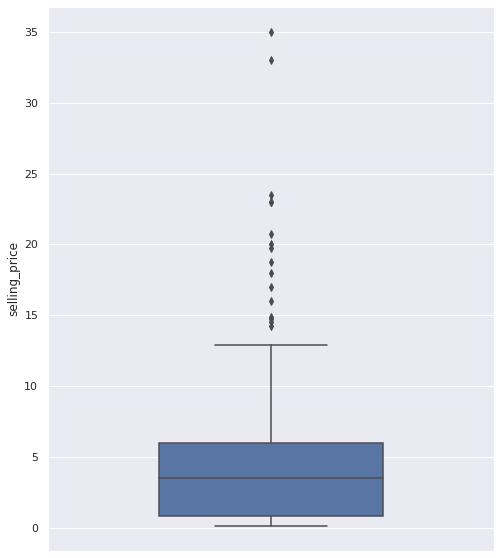

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(y='selling_price', data=dataset, width=0.5)

Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

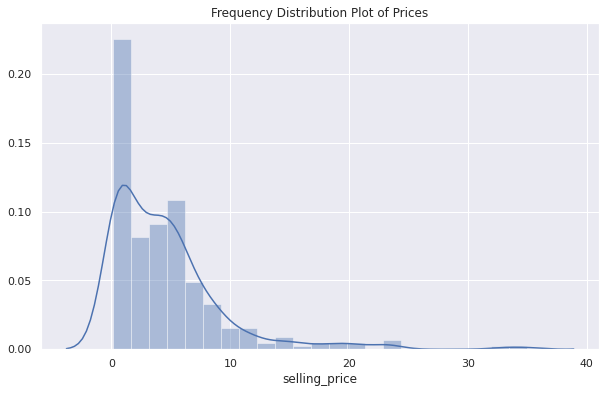

In [ ]:
x = dataset.selling_price
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

In [ ]:
dataset = dataset[dataset.selling_price <= 30.00 ]

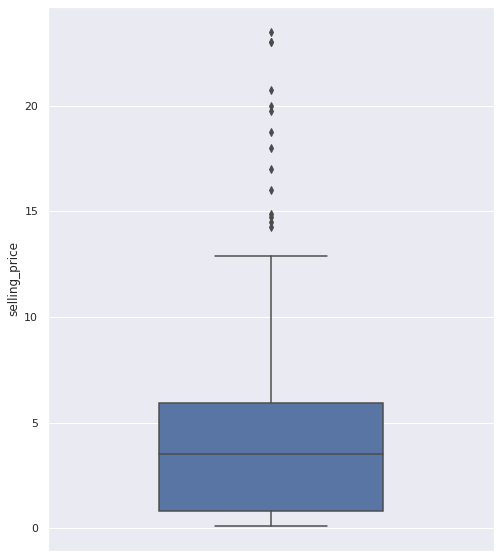

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(y='selling_price', data=dataset, width=0.5)

Missing values


In [ ]:
dataset.isna().any()
dataset.isna().sum()

car_name             1
year                 2
mileage              0
fuel_type            0
seller_type          0
transmission_type    0
previous_owners      0
selling_price        0
dtype: int64

In [ ]:
dataset = dataset.dropna(subset=['car_name'])

In [ ]:
# DONT RUN THIS
datayear = dataset.selling_price
# datayear = dataset.mileage
test = datayear.iloc[-1:]       # sliced it here
test2d = test.values.reshape(1,-1)


In [ ]:
dataset.fillna(dataset['year'].mode()[0], inplace=True)

In [ ]:
# Convert data to binery
dataset = dataset.replace('Petrol','1',regex=True)
dataset = dataset.replace('Diesel','0',regex=True)
dataset = dataset.replace('Dealer','1',regex=True)
dataset = dataset.replace('Individual','0',regex=True)
dataset = dataset.replace('Automatic','1',regex=True)
dataset = dataset.replace('Manual','0',regex=True)
dataset = dataset.replace('CNG','3',regex=True)
dataset["seller_type"] = pd.to_numeric(dataset["seller_type"], downcast="float")
dataset["previous_owners"] = pd.to_numeric(dataset["previous_owners"], downcast="float")
dataset["fuel_type"] = pd.to_numeric(dataset["fuel_type"], downcast="float")
dataset["transmission_type"] = pd.to_numeric(dataset["transmission_type"], downcast="float")


In [ ]:
dataset['car_name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'Royal Enfield Thunder 500', 'UM Renegade Mojave',
       'KTM RC200', 'Bajaj Dominar 400', 'Royal Enfield Classic 350',
       'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350',
       'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', '

In [ ]:
dataset.head()

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
0,ritz,2014.0,27000,1.0,1.0,0.0,0.0,3.35
1,sx4,2013.0,43000,0.0,1.0,0.0,0.0,4.75
2,ciaz,2017.0,6900,1.0,1.0,0.0,0.0,7.25
3,wagon r,2011.0,5200,1.0,1.0,0.0,0.0,2.85
4,swift,2014.0,42450,0.0,1.0,0.0,0.0,4.60


Year

In [ ]:
dataset.year.value_counts() #The age of the car definitely effects the prices. However, instead of the model year of the car, it makes more sense to use is as age. So I will substiture 'year' column from current year.

2015.0    62
2016.0    47
2014.0    38
2013.0    33
2017.0    33
2012.0    23
2011.0    19
2010.0    13
2008.0     7
2009.0     6
2005.0     4
2006.0     4
2003.0     2
2007.0     2
2004.0     1
2018.0     1
Name: year, dtype: int64

In [ ]:
dataset['age'] = 2020 - dataset['year']
dataset.head()

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price,age
0,ritz,2014.0,27000,1.0,1.0,0.0,0.0,3.35,6.0
1,sx4,2013.0,43000,0.0,1.0,0.0,0.0,4.75,7.0
2,ciaz,2017.0,6900,1.0,1.0,0.0,0.0,7.25,3.0
3,wagon r,2011.0,5200,1.0,1.0,0.0,0.0,2.85,9.0
4,swift,2014.0,42450,0.0,1.0,0.0,0.0,4.60,6.0


Text(0.5, 1.0, 'Frequency Distribution Plot of Age of the Cars')

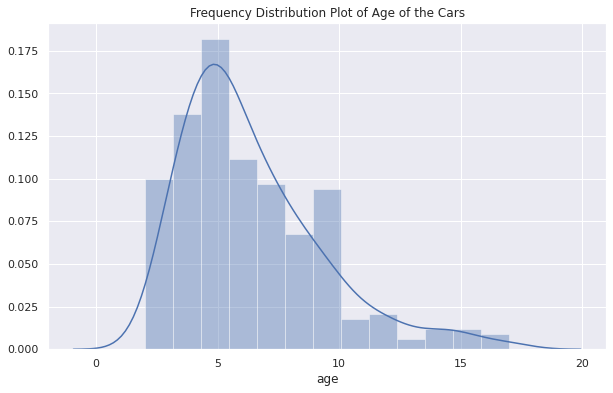

In [ ]:
a = dataset.age
plt.figure(figsize=(10,6))
sns.distplot(a).set_title('Frequency Distribution Plot of Age of the Cars')

mileage

In [ ]:
print(dataset.mileage.mean())
print(dataset.mileage.median())

36767.95593220339
31604.0


Text(0.5, 1.0, 'Frequency Distribution Plot of Km')

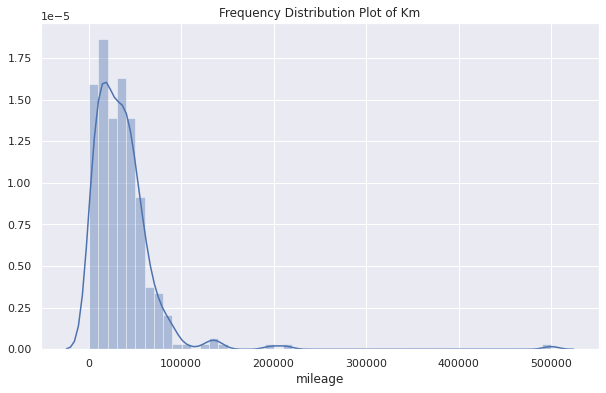

In [ ]:
k = dataset.mileage
plt.figure(figsize=(10,6))
sns.distplot(k).set_title('Frequency Distribution Plot of Km')

Car name

Text(0.5, 1.0, 'Km vs Price')

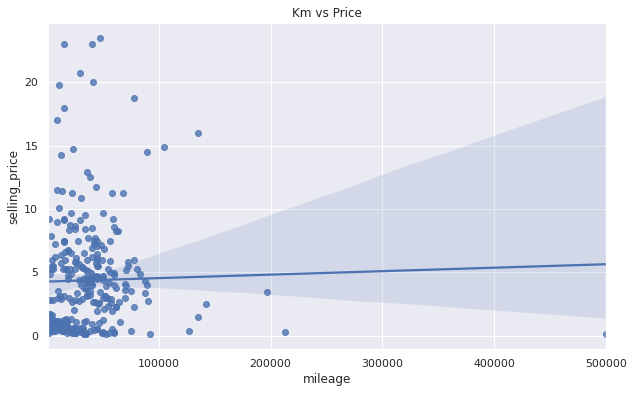

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='mileage', y='selling_price', data=dataset).set_title('Km vs Price')

In [ ]:
dataset.shape


(295, 9)

In [ ]:
dataset = dataset[dataset.mileage < 100000]
dataset.shape


(287, 9)

Text(0.5, 1.0, 'Km vs Price')

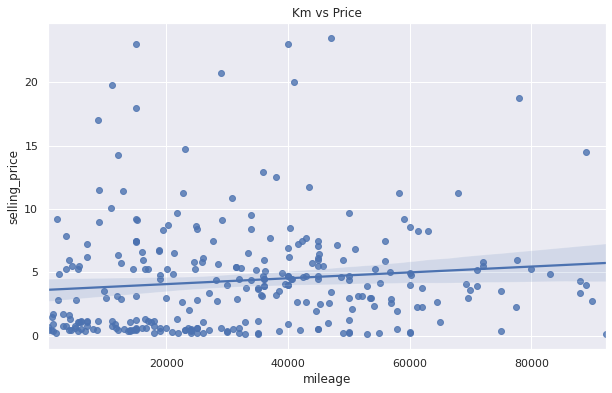

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='mileage', y='selling_price', data=dataset).set_title('Km vs Price')

In [ ]:
print(dataset.corr())
corr = dataset.corr()

                       year   mileage  ...  selling_price       age
year               1.000000 -0.589181  ...       0.264773 -1.000000
mileage           -0.589181  1.000000  ...       0.114248  0.589181
fuel_type         -0.081776 -0.244087  ...      -0.492029  0.081776
seller_type        0.012218  0.355044  ...       0.623002 -0.012218
transmission_type  0.054573 -0.004521  ...       0.359963 -0.054573
previous_owners   -0.104628 -0.034772  ...      -0.105913  0.104628
selling_price      0.264773  0.114248  ...       1.000000 -0.264773
age               -1.000000  0.589181  ...      -0.264773  1.000000

[8 rows x 8 columns]


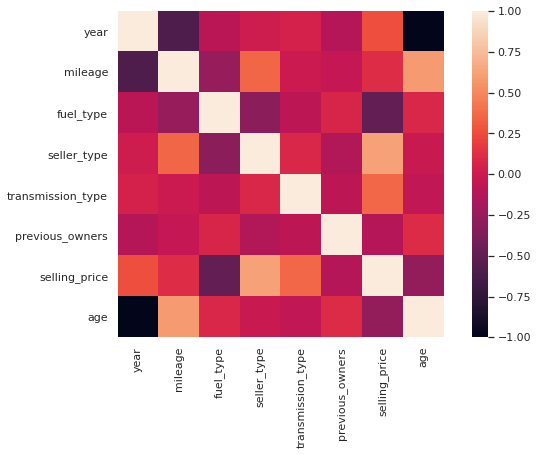

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [ ]:
dataset.head()


,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price,age
0,ritz,2014.0,27000,1.0,1.0,0.0,0.0,3.35,6.0
1,sx4,2013.0,43000,0.0,1.0,0.0,0.0,4.75,7.0
2,ciaz,2017.0,6900,1.0,1.0,0.0,0.0,7.25,3.0
3,wagon r,2011.0,5200,1.0,1.0,0.0,0.0,2.85,9.0
4,swift,2014.0,42450,0.0,1.0,0.0,0.0,4.60,6.0


# Text

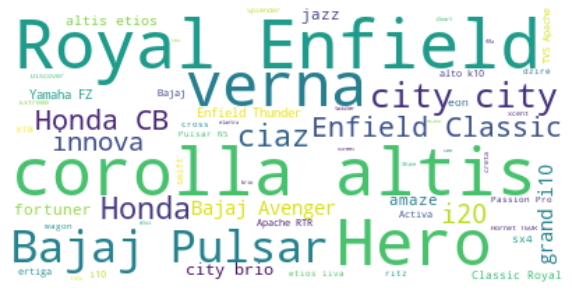

In [ ]:
from wordcloud import WordCloud, STOPWORDS 


# In[525]:


len(dataset.car_name)


# In[526]:


dataset.car_name[1]


# In[527]:

dataset['car_name'] = dataset['car_name'].astype(str)
text_list = list(dataset.car_name)


# In[528]:


text = '-'.join(text_list)


# In[531]:


wordcloud = WordCloud(background_color='white').generate(text)


# In[532]:


plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
dataset['car_name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'etios gd',
       'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200',
       'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390',
       'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
     

In [ ]:
stopwords = ['corolla altis', 'royal', 'Enfield', 'Hero', 'city','Bajaj','verba','i20','fortuner']


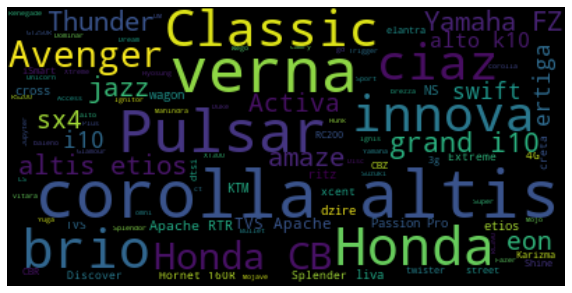

In [ ]:

wordcloud = WordCloud(stopwords=stopwords).generate(text)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
y = pd.get_dummies(dataset.car_name)
y

,Activa,Bajaj,Hero,Honda,Hyosung,KTM,Mahindra,Royal,Suzuki,TVS,UM,Yamaha,alto,amaze,baleno,brio,ciaz,city,corolla,creta,dzire,elantra,eon,ertiga,etios,fortuner,grand,i10,i20,ignis,innova,jazz,omni,ritz,s,swift,sx4,verna,vitara,wagon,xcent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
vertical_stack = pd.concat([y, dataset], axis=1)
vertical_stack

,Activa,Bajaj,Hero,Honda,Hyosung,KTM,Mahindra,Royal,Suzuki,TVS,UM,Yamaha,alto,amaze,baleno,brio,ciaz,city,corolla,creta,dzire,elantra,eon,ertiga,etios,fortuner,grand,i10,i20,ignis,innova,jazz,omni,ritz,s,swift,sx4,verna,vitara,wagon,xcent,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price,age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ritz,2014.0,27000,1.0,1.0,0.0,0.0,3.35,6.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,sx4,2013.0,43000,0.0,1.0,0.0,0.0,4.75,7.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ciaz,2017.0,6900,1.0,1.0,0.0,0.0,7.25,3.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,wagon,2011.0,5200,1.0,1.0,0.0,0.0,2.85,9.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,swift,2014.0,42450,0.0,1.0,0.0,0.0,4.60,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,city,2016.0,33988,0.0,1.0,0.0,0.0,9.50,4.0
297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,brio,2015.0,60000,1.0,1.0,0.0,0.0,4.00,5.0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,city,2009.0,87934,1.0,1.0,0.0,0.0,3.35,11.0
299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,city,2017.0,9000,0.0,1.0,0.0,0.0,11.50,3.0


In [ ]:
dataset = dataset+y
dataset.car_name

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
296   NaN
297   NaN
298   NaN
299   NaN
300   NaN
Name: car_name, Length: 287, dtype: float64

In [ ]:
dataset.car_name[100]

nan

In [ ]:
firstWord = dataset.car_name[100].split()[0]

firstWord

'Royal'

In [ ]:
for ind in dataset.index: 
     dataset['car_name'][ind] = dataset.car_name[ind].split()[0]
    # print(dataset.car_name[ind].split()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset


,Activa,Bajaj,Hero,Honda,Hyosung,KTM,Mahindra,Royal,Suzuki,TVS,UM,Yamaha,age,alto,amaze,baleno,brio,car_name,ciaz,city,corolla,creta,dzire,elantra,eon,ertiga,etios,fortuner,fuel_type,grand,i10,i20,ignis,innova,jazz,mileage,omni,previous_owners,ritz,s,seller_type,selling_price,swift,sx4,transmission_type,verna,vitara,wagon,xcent,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("hel oo".split()[0])

hel


In [ ]:
X = vertical_stack[[
'Activa',	'Bajaj'	, 'Hero'	,'Honda'	,'Hyosung',	'KTM',	'Mahindra',	'Royal',	'Suzuki',	'TVS',	'UM',	'Yamaha',	'alto'	,'amaze',	'baleno'	,'brio',	'ciaz'	,'city'	,'corolla'	,'creta'	,'dzire'	,'elantra'	,'eon'	,'ertiga'	,'etios'	,'fortuner'	,'grand'	,'i10'	,'i20'	,'ignis'	,'innova'	,'jazz'	,'omni'	,'ritz'	,'s'	, 'swift'	, 'sx4' ,	'verna'	,'vitara'	,'wagon'	,'xcent' ,'mileage' ,	'fuel_type' ,	'seller_type'	,'transmission_type'	,'previous_owners'	,'age']]
y = vertical_stack['selling_price']

In [ ]:
X

,Activa,Bajaj,Hero,Honda,Hyosung,KTM,Mahindra,Royal,Suzuki,TVS,UM,Yamaha,alto,amaze,baleno,brio,ciaz,city,corolla,creta,dzire,elantra,eon,ertiga,etios,fortuner,grand,i10,i20,ignis,innova,jazz,omni,ritz,s,swift,sx4,verna,vitara,wagon,xcent,mileage,fuel_type,seller_type,transmission_type,previous_owners,age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,27000,1.0,1.0,0.0,0.0,6.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,43000,0.0,1.0,0.0,0.0,7.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6900,1.0,1.0,0.0,0.0,3.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5200,1.0,1.0,0.0,0.0,9.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,42450,0.0,1.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33988,0.0,1.0,0.0,0.0,4.0
297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60000,1.0,1.0,0.0,0.0,5.0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87934,1.0,1.0,0.0,0.0,11.0
299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9000,0.0,1.0,0.0,0.0,3.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear Regression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
scores = cross_val_score(linreg, X_train, y_train, cv=5)
print(np.mean(scores))

0.5684406354523699


In [ ]:
scores_test = cross_val_score(linreg, X_test, y_test, cv=5)
print(np.mean(scores_test))

0.6563594952954552


In [ ]:
linreg.score(X_train, y_train)


0.616460513631316

In [ ]:
linreg.score(X_test, y_test)


0.6683723092472352

In [ ]:
y_pred = linreg.predict(X_test)

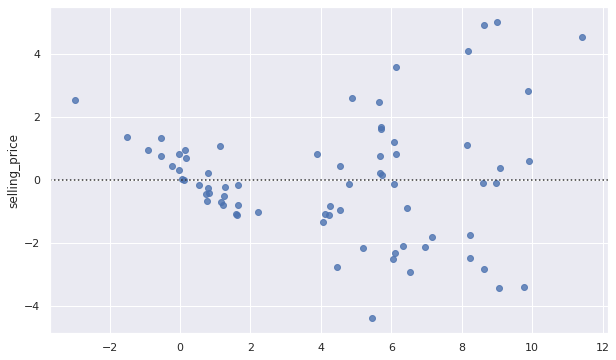

In [ ]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

With names as one hot encoding

0.8106337315953601
-2199486606524.9556
R-squared score (training): 0.890
R-squared score (Testing): 0.833


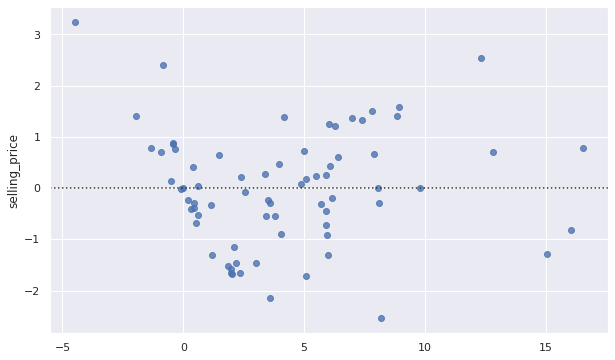

In [ ]:
linreg1 = LinearRegression()
linreg1.fit(X_train, y_train)
scores = cross_val_score(linreg1, X_train, y_train, cv=5)
print(np.mean(scores))
scores_test = cross_val_score(linreg1, X_test, y_test, cv=5)
print(np.mean(scores_test))
print('R-squared score (training): {:.3f}'
     .format(linreg1.score(X_train, y_train)))
print('R-squared score (Testing): {:.3f}'
     .format(linreg1.score(X_test, y_test)))
y_pred = linreg1.predict(X_test)
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

# random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))

R-squared score (training): 0.951


In [ ]:
print('R-squared score (testing): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (testing): 0.660


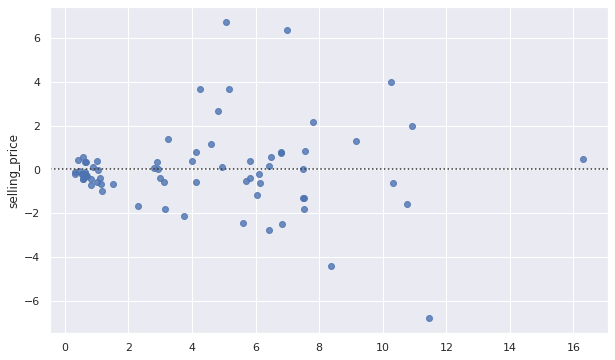

In [ ]:
y_pred = regr.predict(X_test)
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

With names as one hot encoding

0.8417292092031268
0.6616655335305401
R-squared score (training): 0.969
R-squared score (Testing): 0.879


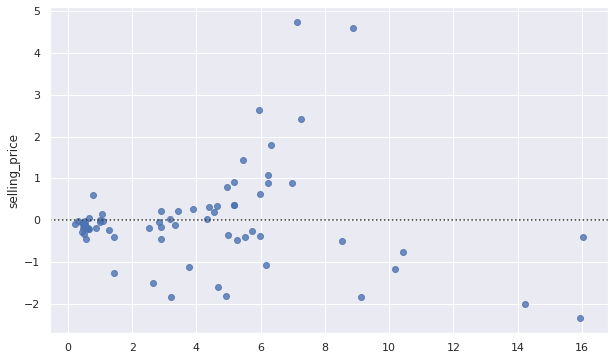

In [ ]:
regr1 = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)
regr1.fit(X_train, y_train)
scores = cross_val_score(regr1, X_train, y_train, cv=5)
print(np.mean(scores))
scores_test = cross_val_score(regr1, X_test, y_test, cv=5)
print(np.mean(scores_test))
print('R-squared score (training): {:.3f}'
     .format(regr1.score(X_train, y_train)))
print('R-squared score (Testing): {:.3f}'
     .format(regr1.score(X_test, y_test)))
y_pred = regr1.predict(X_test)
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

# Suport vector regration 

In [ ]:
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf') 
regressor.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_train, y_train)))

R-squared score (training): -0.095


In [ ]:
print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_test, y_test)))

R-squared score (training): -0.062


In [ ]:
# 5 Predicting a new result
y_pred = regressor.predict(X_test)

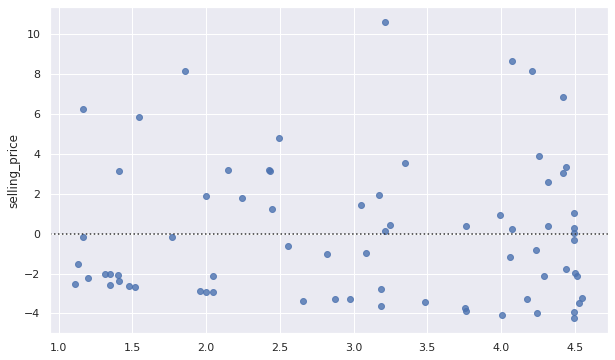

In [ ]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

With names as one hot encoding

-0.04923169426762475
-0.11296839411165156
R-squared score (training): -0.038
R-squared score (Testing): 0.026


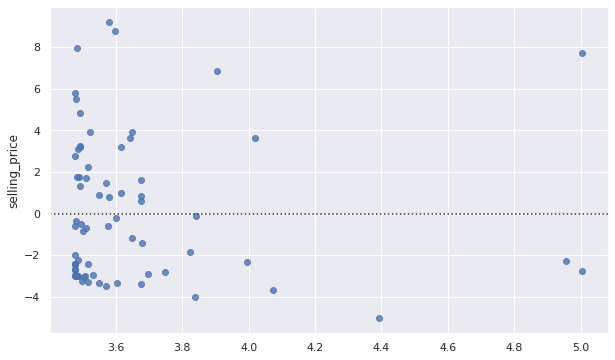

In [ ]:
regressor1 = SVR(kernel='poly')  # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
regressor1.fit(X_train, y_train)
scores = cross_val_score(regressor1, X_train, y_train, cv=5)
print(np.mean(scores))
scores_test = cross_val_score(regressor1, X_test, y_test, cv=5)
print(np.mean(scores_test))
print('R-squared score (training): {:.3f}'
     .format(regressor1.score(X_train, y_train)))
print('R-squared score (Testing): {:.3f}'
     .format(regressor1.score(X_test, y_test)))
y_pred = regressor1.predict(X_test)
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

# CNN
src: https://machinelearningmastery.comregression-tutorial-keras-deep-learning-library-python/

In [ ]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(47 , input_dim=47 , kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -30.10 (22.05) MSE


In [ ]:
from sklearn.pipeline import Pipeline

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(47, input_dim=47, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -4.78 (6.60) MSE


In [ ]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(47, input_dim=47, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std())) # The smaller the means squared error, the closer you are to finding the line of best fit.

Larger: -4.77 (6.01) MSE


# Conda setup 
src: https://towardsdatascience.com/conda-google-colab-75f7c867a522

In [ ]:
!which python # should return /usr/local/bin/python


/usr/local/bin/python


In [ ]:
!python --version


Python 3.6.9


In [ ]:
!echo $PYTHONPATH


/env/python


In [ ]:
%env PYTHONPATH=


env: PYTHONPATH=


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-07-14 10:56:58--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-07-14 10:56:58--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 3.95M 14s
    50K .......... .......... .......... .......... ..........  0

In [ ]:
!which conda # should return /usr/local/bin/conda


/usr/local/bin/conda


In [ ]:
!conda --version # should return 4.5.4


conda 4.5.4


In [ ]:
!which python # still returns /usr/local/bin/python


/usr/local/bin/python


In [ ]:
!python --version # now returns Python 3.6.5 :: Anaconda, Inc.


Python 3.6.5 :: Anaconda, Inc.


In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sqlite-3.32.3              |       h62c20be_0         2.0 MB
    yaml-0.2.5                 |       h7b6447c_0          87 KB
    idna-2.10                  |             py_0          56 KB
    certifi-2020.6.20          |           py36_0         160 KB
    cryptography-2.9.2         |   py36h1ba5d50_0         626 KB
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB
    six-1.15.0                 |             py_0          13 KB
    tk-8.6.10                  |       hbc83047_0         3.2 MB
    zlib-1.2.11                |       h7b6447c_3         120 KB
    requests-2.24.0            |             py_0          54 KB
    cffi-1.14.0                |   py36he30daa8_1   

sqlite-3.32.3        |  2.0 MB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
idna-2.10            |   56 KB | ########## | 100% 
certifi-2020.6.20    |  160 KB | ########## | 100% 
cryptography-2.9.2   |  626 KB | ########## | 100% 
openssl-1.1.1g       |  3.8 MB | ########## | 100% 
six-1.15.0           |   13 KB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
requests-2.24.0      |   54 KB | ########## | 100% 
cffi-1.14.0          |  226 KB | ########## | 100% 
ld_impl_linux-64-2.3 |  645 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
ca-certificates-2020 |  133 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
python-3.6.10        | 33.9 MB | ########## | 100% 
wheel-0.34.2         |   49 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
tqdm-4.47.0          |   62 KB | ########## | 100% 
conda-packag

In [ ]:
!conda --version # now returns 4.8.3


conda 4.8.3


In [ ]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.


Python 3.6.10 :: Anaconda, Inc.


In [ ]:
!conda install -c https://conda.anaconda.org/conda-forge wordcloud


Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    conda-4.8.3                |   py36h9f0ad1d_1         3.0 MB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    freetype-2.10.2            |       he06d7ca_0         905 KB  conda-forge
    icu-67.1                   |       he1b5a44_0        12.9 MB  conda-forge
    jpeg-9d                    |       h516909a_0         266 KB  conda-forge
    kiwisolver-1.2.0           |   py36hdb11119_0          87 KB  conda-forge
    lc